# Day 4 (9/14) in-class notebook

The objectives of this notebook are to practice
* how data are generated from universal DNA arrays
* how data are generated from a DNA shotgun sequencing experiment
* plotting with matplotlib
* raising and handling exceptions

## The Ebola virus genome

In 2014, an outbreak of the Ebola virus devastated human populations in West Africa, killing more than [11,000 people](https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/index.html).  During the outbreak, a group of researchers obtained virus samples from 78 patients, sequenced and assembled the Ebola virus genomes from these samples, and used the genome sequences to identify the origin of the outbreak ([Gire et al. 2014](http://science.sciencemag.org/content/345/6202/1369.long)).  In this notebook, we will work with one of the genome assemblies produced by this study.

The Ebola virus is a negative-sense single-stranded RNA virus.  This means that its genome is actually an RNA, rather than a DNA, molecule.  It has a genome that is in the "negative-sense" orientation, meaning that the mRNAs encoded by the genes in its genome are in the reverse complement orientation.  For this class of viruses, transcription is actually an RNA to RNA process.

Although the virus's genome is an RNA molecule, we will work with it as though it were DNA, as one typically needs to convert from RNA to DNA (via reverse transcription) before using the latest sequencing technologies.

### Problem 1: Reading from a FASTA file (1 POINT)

The genome assembly that we will work with in this notebook is saved in the file `ebola_virus_isolate_G3686.fasta` and was downloaded from its [Genbank record](https://www.ncbi.nlm.nih.gov/nuccore/KM034562).  This file is in [FASTA format](https://en.wikipedia.org/wiki/FASTA_format), one of the most common formats for storing biological sequence data.  To save you some time, I have provided you with a `fasta` module that you can use to read in the viral sequence that is in this file.  In the code block below, use one of the functions from the `fasta` module to read in the name and sequence of the ebola virus genome assembly.

In [1]:
import fasta
help(fasta.read_sequences_from_fasta_file)

Help on function read_sequences_from_fasta_file in module fasta:

read_sequences_from_fasta_file(filename)
    Reads all sequence records from the FASTA-formatted file specified by filename
    and returns a list of records.  Each record is represented by a tuple (name, sequence)



In [2]:
ebola_sequence_filename = "ebola_virus_isolate_G3686.fasta"
# In the code below, assign the name of the viral sequence to the variable 'ebola_sequence_name'
# and assign the sequence to the variable 'ebola_sequence'
#
# YOUR CODE HERE
(ebola_sequence_name, ebola_sequence) = fasta.read_sequences_from_fasta_file(ebola_sequence_filename)[0]
#


In [3]:
# tests for reading in the ebola sequence from a FASTA file
assert isinstance(ebola_sequence_name, str) and len(ebola_sequence_name) == 101, "Failed to assign ebola_sequence_name"
assert isinstance(ebola_sequence, str) and len(ebola_sequence) == 18957, "Failed to assign ebola_sequence"
print("SUCCESS: reading in the ebola sequence from a FASTA file passed all tests!")

SUCCESS: reading in the ebola sequence from a FASTA file passed all tests!


## Simulating universal DNA array data

We will start by generating the sort of data that one would hope to get from a universal DNA array.  Recall that a universal DNA array gives you information about the presence or absence of each possible DNA "$k$-mer", which is a DNA substring of length $k$, within your sample of DNA.  Here, we will assume that we have universal DNA arrays that give us perfect error-free data.  In practice, such arrays are far from perfect, and are no longer used for sequencing purposes.  However, the type of data they generate is useful to think about from a computational perspective.

### Problem 2: $k$-mer spectrum of a DNA sequence (1 POINT)

Write a function `kmer_spectrum` below that takes as input a DNA sequence and a length $k$ and returns a `set` object containing all unique $k$-mers within the input sequence, which we will refer to as its "$k$-mer spectrum".  This is an idealized form of the data that a universal DNA array would give us.  For simplicitly, in this activity we will treat a DNA sequence as a single-stranded molecule.  In practice, one would have to handle the fact that DNA is double-stranded.

In [9]:
def reverse_complement(dna_sequence):
    #print("original seq " + dna_sequence)
    compliment_dict = {
        'T':'A',
        'A':'T',
        'C':'G',
        'G':'C'
    }
    reverse_comp = ''.join([compliment_dict[char] for char in dna_sequence[::-1]])
    #for char in dna_sequence:
    #    print(char+":"+compliment_dict[char])
    #print("reverse comp "+reverse_comp)
    return reverse_comp

def kmer_spectrum(dna_sequence, k, forward_only=True):
    #
    # YOUR CODE HERE

    def spectrum_set(dna_sequence, k):
        #print("DNA SEQ: {}".format(dna_sequence))
        spectrum = set([dna_sequence[i:i+k] for i in range(len(dna_sequence)-k+1)])
        #for i in range(len(dna_sequence)-k):
            #print("dna_sequence[{}:{}] = {}".format(i,i+k,dna_sequence[i:i+k]))
        #print(spectrum)
        return spectrum
    spectrum = {}
    forward_spectrum = spectrum_set(dna_sequence,k)
    if(forward_only): return forward_spectrum
    reverse_comp = reverse_compliment(dna_sequence)
    reverse_spectrum = spectrum_set(reverse_comp,k)
    spectrum = set.union(forward_spectrum,reverse_spectrum)
    print(spectrum)
    return spectrum
    #


In [10]:
# tests for kmer_spectrum
assert kmer_spectrum("ACGTCGA", 3) == {'ACG', 'CGA', 'CGT', 'GTC', 'TCG'}
assert kmer_spectrum("TCTATCT", 3) == {'ATC', 'CTA', 'TAT', 'TCT'}
assert kmer_spectrum("ACGTCGA", 2) == {'AC', 'CG', 'GA', 'GT', 'TC'}
assert kmer_spectrum("AAAAAAA", 2) == {'AA'}
assert kmer_spectrum("T", 3) == set()
print("SUCCESS: kmer_spectrum passed all tests!")

SUCCESS: kmer_spectrum passed all tests!


### Problem 3: $k$-mer spectrum of the Ebola genome sequence (1 POINT)

Use your `kmer_spectrum` function to compute the spectrum for the ebola genome sequence for $k = 1, 2, \ldots, 25$.  Assign to the variable `ebola_spectrum_sizes` a list of the sizes of these spectra.

In [11]:
k_values = range(1, 26)
#
# YOUR CODE HERE
ebola_spectrum_sizes = [len(kmer_spectrum(ebola_sequence,k)) for k in k_values]
ebola_spectrum_sizes_fwd = [len(kmer_spectrum(ebola_sequence,k,True)) for k in k_values]
#print(ebola_spectrum_sizes[0])
#


In [12]:
# tests for ebola_spectrum_sizes
assert len(ebola_spectrum_sizes) == 25, "Failed required size"
assert ebola_spectrum_sizes[0] == 4, "Failed on value of first entry"
#
# AUTOGRADER TEST - DO NOT REMOVE
#
print("SUCCESS: ebola_spectrum_sizes passed all tests!")

SUCCESS: ebola_spectrum_sizes passed all tests!


Next let us make a plot of the size of the ebola spectra vs. $k$.  To do this, we will use the Python package [`matplotlib`](https://matplotlib.org/).  For simplicity, we will use the Pyplot interface of this package.  I encourage you to read through the [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html).

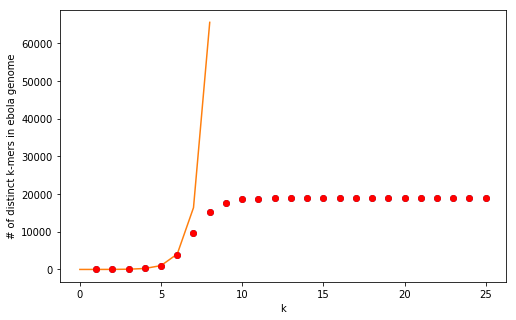

In [13]:
import matplotlib.pyplot as plt
xran = range(9)
y = [4**x for x in xran]
x = xran[::]
plt.figure(figsize = (8, 5))
plt.plot(k_values, ebola_spectrum_sizes, 'o', x, y, '-',k_values, ebola_spectrum_sizes_fwd,'ro')
plt.xlabel('k')
plt.ylabel('# of distinct k-mers in ebola genome')
plt.show()

Examine the plot above.  
* Why does it have this shape?
* For which value of $k$ are all $k$-mers in the Ebola genome unique?  
* Is this value of $k$ surprising?
Talk with your neighbors and write your thoughts about these questions below.

*WRITE YOUR THOUGHTS HERE*

I also graphed $n^4$ on the same plot and it shoes the same outputs until around 8. This means that roughly every kmer for $0<n<9$ is present, but diversity levels off at around $k=9$. This seems to indicate that even in introns, any two codons can follow each other, and perhaps any three AA codes can also follow each other, but the following sequence is largely determined by the first 8 nucleic acids. 

Then I graphed the forward only kmer sizes, and it is roughly half of the fwd-rvs sizes. It only follows $4^n$ until $n=6$ Under this new information it seems that only **2** random codons may follow each other in the forward direction. I would think that this excludes stop codons. 

*TLDR: I hypthesize that nucleic acid diversity is limitted to 6mers in the forward direction and 8mers in the reverse.*

## Simulating reads from a DNA shotgun sequencing experiment

Recall that a DNA shotgun sequencing experiment involves three steps to generate read data:
1. Fragmentation of many identical copies of the DNA of interest.
2. Random sampling of a subset of the resulting DNA fragments.
3. Sequencing a read of limited length from one end from each of the sampled fragments.

We will write functions to model each aspect of this proecss and then put them all together to simulate a set of reads from a DNA shotgun sequencing experiment.

### PROBLEM 4 - Fragmentation simulation (1 POINT)

We will first model the fragmentation of the DNA sequence, for which we have a very large number of identical copies.  Each copy of the DNA will be fragmented randomly, likely resulting in a unique fragmentation pattern for each DNA molecule.  Fragmentation is a complex process to model, however, for the purposes of this activity, we will simulate it in a very simple manner, by choosing `k` distinct positions along a given DNA molecule at which to cut the molecule.  Each cut position will be chosen randomly and uniformly across the entire DNA molecule.  We will specify the cut position by the index (0-based) of the base to the *right* of the cut.

Write a function that takes as input the length of the DNA sequence that is to be fragmented and the number of positions, `k`, at which to cut the DNA, and returns a *sorted* list of the intervals of the resulting DNA fragments.  Each interval should be specified by a tuple, of the form `(start, end)`, which will represent the fragment of DNA beginning at `start` (0-based coordinates) and spanning up to, **but not including**, `end` (another way to think about it is that these are the indices that you would use to slice the Python string to obtain the fragment's sequence).

To generate random cut points, you will use the pseuodorandom number generating functionality provided by Python's [random module](https://docs.python.org/3/library/random.html).  For the purposes of being to able to test your code, you will need to use **a single call** of the `random.sample` function to randomly generate all of the cut points simultaneously within your function.

In [14]:
import random
def fragment_dna(length, k):
    #
    # YOUR CODE HERE
    rand_samples = random.sample(range(length-1),k)
    #print(rand_samples)
    rand_samples.sort()
    #print(rand_samples)
    #rand_samples.append(length)
    #print(rand_samples)
    prev = 0;
    fragments = []
    for num in rand_samples:
        fragments.append((prev,num+1))
        prev = num + 1
        #print(fragments)
    fragments.append((prev,length))
    #print(fragments)
    return fragments
    #


In [23]:
# tests for fragment_dna
# We will use the seed function to reset the pseudorandom number generator to a specific state
# so that we can test inputs with known outputs
def fragment_dna_with_seed(length, k, seed):
    random.seed(seed)
    return fragment_dna(length, k)
assert fragment_dna_with_seed(100, 3, 42) == [(0, 4), (4, 15), (15, 82), (82, 100)], "Failed on 100, 3 (seed 42)"
assert fragment_dna_with_seed(100, 2, 43) == [(0, 5), (5, 37), (37, 100)], "Failed on 100, 3 (seed 43)"
assert fragment_dna_with_seed(100, 1, 44) == [(0, 53), (53, 100)], "Failed on 100, 3 (seed 44)"
assert fragment_dna_with_seed(100, 0, 45) == [(0, 100)], "Failed on 100, 3 (seed 45)"
assert fragment_dna_with_seed(5, 4, 46) == [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)], "Failed on 5, 4 (seed 46)"
print("SUCCESS: fragment_dna passed all tests!")

SUCCESS: fragment_dna passed all tests!


For your convenience, below is a function that will fragment multiple copies of a genome of a given length and return a list with all fragment intervals combined and sorted.

In [24]:
def fragment_multiple_dna_copies(length, k, num_copies):
    intervals = []
    for i in range(num_copies):
        intervals.extend(fragment_dna(length, k))
    return sorted(intervals)

### PROBLEM 5 - Filtering fragments (1 POINT)

We will next model the random sampling of a set of fragments to be sequenced by our sequencing technology of chioce.  Typically, only fragments longer than a certain minimum length will be sequenceable, so we will first filter the set of possible fragments by length before selecting a subset.

Let us first write a function that filters fragments by length.  This function should take a list of fragment intervals (as would be produced by `fragment_multiple_dna_copies`) and a minimum length and returns a new list that contains only those intervals whose lengths are at least the minimum, in the same order as they appeared in the input list.

You might consider using a list comprehension with an `if` clause for this purpose.  Alternatively, you might consider using the [`filter`](https://docs.python.org/3/library/functions.html#filter) higher-order function with a [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) expression.

In [25]:
def filter_for_long_fragments(fragment_list, min_length):
    #
    # YOUR CODE HERE
    #print(fragment_list)
    fragment_list_filter = filter(lambda x: True if x[1]-x[0] >= min_length else False, fragment_list)
    fragment_list = [x for x in fragment_list_filter]
    #print(fragment_list)
    return fragment_list
    #


In [26]:
# tests for filter_for_long_fragments
test_fragment_list = [(0, 4), (4, 15), (15, 82), (82, 100)]
assert filter_for_long_fragments(test_fragment_list, 20) == [(15, 82)], "Failed for min_length = 20"
assert filter_for_long_fragments(test_fragment_list, 5) == [(4, 15), (15, 82), (82, 100)], "Failed for min_length = 5"
assert filter_for_long_fragments(test_fragment_list, 0) == test_fragment_list, "Failed for min_length = 0"
assert filter_for_long_fragments(test_fragment_list, 100) == [], "Failed for min_length = 100"
print("SUCCESS: filter_for_long_fragments passed all tests!")

SUCCESS: filter_for_long_fragments passed all tests!


### PROBLEM 6 - Sampling fragments (1 POINT)
Next, we will write a function to sample fragments.  We will again use the `random.sample` function from the `random` module.  Note that this function raises an exception if you ask it to sample more elements than are present in the sequence input (since it samples *without* replacement).  For example,

In [27]:
try:
    random.sample([1, 2, 3, 4], 6)
except Exception as err:
    print(err)

Sample larger than population


This error is not as user-friendly as we might like it to be for someone who is using our functions to randomly sample DNA fragments from a large pool of DNA fragments.  Let us remedy this by explicitly checking that the number of fragments requested is smaller than the size of the pool and if it is not, raising a `ValueError` exception with a more informative message.  Let the format of the error message be `"The number of fragments to be sampled (INSERT_NUM_FRAGMENTS_HERE) is larger than the fragment pool (INSERT_FRAGMENT_LIST_LENGTH_HERE)`".

In [28]:
def sample_fragments(fragment_list, num_fragments):
    # Check for num_fragments being valid
    #
    # YOUR CODE HERE
    fragment_list_length = len(fragment_list)
    if num_fragments > fragment_list_length:
        raise ValueError("The number of fragments to be sampled ({}) is larger than the fragment pool ({})".format(num_fragments, fragment_list_length))
    #
    return sorted(random.sample(fragment_list, num_fragments))
#test_fragment_list = [(0, 4), (4, 15), (15, 82), (82, 100)]
#sample_fragments(test_fragment_list, 5)

In [29]:
# tests for sample_fragments
test_fragment_list = [(0, 4), (4, 15), (15, 82), (82, 100)]
random.seed(42)
assert sample_fragments(test_fragment_list, 2) == [(0, 4), (82, 100)]
random.seed(42)
assert sample_fragments(test_fragment_list, 4) == [(0, 4), (4, 15), (15, 82), (82, 100)]
random.seed(42)
try:
    sample_fragments(test_fragment_list, 5)
except ValueError as err:
    assert str(err) == "The number of fragments to be sampled (5) is larger than the fragment pool (4)", "Failed to raise the correct error message"
except Exception as err:
    raise AssertionError("Raised something other than a ValueError")
else:
    raise AssertionError("Failed to raise an exception with num_fragments = 5")
print("SUCCESS: sample_fragments passed all tests!")

SUCCESS: sample_fragments passed all tests!


### PROBLEM 7 - Sequencing fragments (1 POINT)
Finally, a sequencer will be applied to the sampled fragments to read one or both of its ends. We will assume that we are using a sequencing technology (such as Illumina) that reads a fixed length from one strand of the fragment starting at the 5' end of that strand and reading in the 5' to 3' direction.  Thus, the end of the fragment that is sequenced depends on which strand is chosen.  We will assume that for each fragment independently, the strand that is sequenced is chosen at random.

Write a function `read_fragment` that takes as input a fragment interval and a read length and returns an "oriented" read interval `(start, end, strand)` representing the interval of the genome that is read by the sequencer and the orientation (strand) of that read.  For example, with a read length of 100 the fragment interval (500, 800) would result in an oriented read interval of either `(500, 600, +)` or `(700, 800, -)`.  We will use `+` to represent the forward strand (the strand whose sequence is represented by the genome string) and `-` to represent the reverse strand.

In [31]:
def read_fragment(fragment, read_length):
    strand = random.choice("+-")
    #
    # YOUR CODE HERE
    frag_len = fragment[1] - fragment[0]
    if read_length > frag_len:
        read_length = frag_len
    if strand == "+":
        return (fragment[0], fragment[0] + read_length, '+')
    elif strand == "-":
        return (fragment[1] - read_length, fragment[1], '-')
    else:
        raise Error("Fragment not read correctly")
    #
read_fragment((500, 800), 400)
import random


In [32]:
# tests for read_fragment
random.seed(42)
assert read_fragment((500, 800), 100) == (500, 600, '+'), "Failed on (500, 800), 100 (seed 42)"
random.seed(44)
assert read_fragment((500, 800), 100) == (700, 800, '-'), "Failed on (500, 800), 100 (seed 44)"
random.seed(42)
assert read_fragment((500, 800), 400) == (500, 800, '+'), "Failed on (500, 800), 400 (seed 42)"
print("SUCCESS: read_fragment passed all tests!")

SUCCESS: read_fragment passed all tests!


### Problem 8 - Putting it all together: simulating shotgun sequencing oriented read intervals (1 POINT)

We will now put all of the functions you have written for simulating fragmentation, filtering fragments by length, random selection, and fragment sequencing together.  Write a function that takes as input 
1. `genome_length`: the length of the DNA sequence of interest
2. `num_copies`: the number of identical copies of the DNA in the sample
3. `k`: the number of cuts in each DNA during fragmentation
4. `min_fragment_length`: the minimum length of a fragment to be sequenced
5. `num_fragments`: the number of fragments to sequence
6. `read_length`: the length of the reads

and outputs a simulates a list of the oriented read intervals that would be sequenced.

In [33]:
def simulate_shotgun_sequencing_read_intervals(    genome_length,
    num_copies = 10000,
    k = 10,
    min_fragment_length = 300,
    num_fragments = 1000,
    read_length = 100):
    #
    # YOUR CODE HERE
    dna_frags = fragment_multiple_dna_copies(genome_length, k, num_copies)
    long_only = filter_for_long_fragments(dna_frags, min_fragment_length)
    sampled_frags = sample_fragments(long_only, num_fragments)
    shotgun_sequences_to_read = [read_fragment(fragment=f, read_length=read_length) for f in sampled_frags]
    return shotgun_sequences_to_read
    # for num copies
    # cut genome into kmers
    # make fragments
    #

print(simulate_shotgun_sequencing_read_intervals(genome_length = 100,
                                                  num_copies = 10,
                                                  k = 5,
                                                  min_fragment_length = 10,
                                                  num_fragments = 3,
                                                  read_length = 10))

[(0, 10, '+'), (62, 72, '-'), (70, 80, '+')]


In [34]:
# tests for simulate_shotgun_sequencing_read_intervals
random.seed(42)
assert simulate_shotgun_sequencing_read_intervals(genome_length = 100,
                                                  num_copies = 10,
                                                  k = 5,
                                                  min_fragment_length = 10,
                                                  num_fragments = 3,
                                                  read_length = 10) == [(34, 44, '-'), (36, 46, '+'), (77, 87, '-')]
print("SUCCESS: simulate_shotgun_sequencing_read_intervals passed all tests!")

SUCCESS: simulate_shotgun_sequencing_read_intervals passed all tests!


### Simulating read intervals from the Ebola genome
Let us use our function from the last section to simulate some read intervals along the Ebola genome.

In [35]:
import math
simulated_ebola_read_intervals = simulate_shotgun_sequencing_read_intervals(
    genome_length = len(ebola_sequence),
    num_copies = 10000,
    k = 10,
    min_fragment_length = 300,
    num_fragments = 1000,
    read_length = 100)
print(len(ebola_sequence))
# print(simulated_ebola_read_intervals)
#for k in range(10,30):
#    num_reads = len(simulate_shotgun_sequencing_read_intervals(genome_length = len(ebola_sequence), k = k))
#    print("{}: {}".format(k, num_reads))

18957


A common feature to examine in shotgun sequencing data is the "read coverage" distribution, which is how many reads cover (overlap) each position along the genome.  Below is a function that you can use to quickly compute read coverage given a list of oriented read intervals.

In [36]:
def read_coverage(read_intervals, genome_length):
    """Given a list of oriented read intervals and the genome length
    compute the number of reads covering (overlapping) each position
    along the genome.  Returns a list of coverage values."""
    num_reads_starting = [0] * genome_length
    num_reads_ending = [0] * genome_length
    for start, end, strand in read_intervals:
        num_reads_starting[start] += 1
        num_reads_ending[end - 1] += 1
    coverage = [0] * genome_length
    coverage[0] = num_reads_starting[0]
    for i in range(1, genome_length):
        coverage[i] = coverage[i - 1] - num_reads_ending[i - 1] + num_reads_starting[i] 
    return coverage

And here is a function to plot the read coverage.

In [37]:
def plot_read_coverage(coverage):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,4))
    plt.plot(range(len(coverage)), coverage)
    plt.xlabel('position along Ebola genome')
    plt.ylabel('# of reads covering position')
    plt.show()

Now let us compute and plot the read coverage across the genome.

In [39]:
import statistics
for k in range(8,15): 
    for num_copies in [10000,20000]:
        print("k: {} | num_copies: {} |".format(k,num_copies), end=" ")
        simulated_ebola_read_intervals = simulate_shotgun_sequencing_read_intervals(genome_length=len(ebola_sequence), k=k, num_copies=num_copies)
        simulated_ebola_read_coverage = read_coverage(simulated_ebola_read_intervals, len(ebola_sequence))
        #plot_read_coverage(simulated_ebola_read_coverage)
        uncovered = 0
#        for i, num_covers in enumerate(simulated_ebola_read_coverage):
#            if num_covers == 0: 
#        #        print(i,end=" ")
#                uncovered += 1
#        #print("\n------------------")
#        print("uncovered: {}".format(uncovered), end=" ")
#        print("| Avg: {}".format(sum(simulated_ebola_read_coverage) / len(simulated_ebola_read_coverage)), end=" ")
#        print("| Std Dev: {}".format(statistics.stdev(simulated_ebola_read_coverage)))

k: 8 | num_copies: 10000 | k: 8 | num_copies: 20000 | k: 9 | num_copies: 10000 | k: 9 | num_copies: 20000 | k: 10 | num_copies: 10000 | k: 10 | num_copies: 20000 | k: 11 | num_copies: 10000 | k: 11 | num_copies: 20000 | k: 12 | num_copies: 10000 | k: 12 | num_copies: 20000 | k: 13 | num_copies: 10000 | k: 13 | num_copies: 20000 | k: 14 | num_copies: 10000 | k: 14 | num_copies: 20000 | 

Examine the plot above and discuss the following questions with your neigbhors:  
* Why does it have this shape?
* Try changing the parameters of the simulation slightly.  Which parameters have the greatest effect on the read coverage distribution?
* What might be important about this distribution for the purposes of assembling the genome?
Write your thoughts about these questions below.

*WRITE YOUR THOUGHTS HERE*
I would guess that this shape comes from a random probability for a number of reads at every position, centered around a specific position.
My conjecture:
The number of nucleic acids read is  <= **read_length** $*$ **num_fragments**, but this number needs to be at least **genome_length**. In our situation this would be roughly
100,000 / 20,000 or 5. 

I tried other variabless with little avail. 

Greatest effect: read length
Second greatest effect: number of reads



### Problem 9 - Read intervals to read sequences (1 POINT)

Although it has been convenient and efficent to work with read intervals, we will ultimately want to simulated actual read sequences, which will be the input to a genome assembly method.  For simplicity, we assume that the sequencer is error free.  Later, we will consider how sequencing errors might occur and complicate the assembly task.

First write a function that takes as input the genome sequence and a single oriented read interval and outputs the DNA  sequence of the read for the given interval and orientation.

In [44]:
def sequence_for_read_interval(read_interval, genome_sequence):
    #
    # YOUR CODE HERE
    start, stop, orientation = read_interval
    if orientation == '+':
        read_interval_sequence = genome_sequence[start:stop]
    elif orientation == '-':
        read_interval_sequence = reverse_complement(genome_sequence[start:stop])
        
    else:
        raise Exception
    return read_interval_sequence
    #
    
# You will likely want to use your reverse_complement function from day 1
# which you can paste below
#
# YOUR CODE HERE
#


In [51]:
# tests for sequence_for_read_interval
assert sequence_for_read_interval((0, 5, '+'), "CGATGCTTAA") == 'CGATG', "Failed on (0, 5, '+')"
assert sequence_for_read_interval((0, 5, '-'), "CGATGCTTAA") == 'CATCG', "Failed on (0, 5, '-')"
assert sequence_for_read_interval((4, 10, '+'), "CGATGCTTAA") == 'GCTTAA', "Failed on (4, 10, '+')"
assert sequence_for_read_interval((4, 10, '-'), "CGATGCTTAA") == 'TTAAGC', "Failed on (4, 10, '-')"
print("SUCCESS: sequence_for_read_interval passed all tests!")

SUCCESS: sequence_for_read_interval passed all tests!


### Problem 10 - Putting it all together: simulating shotgun sequencing read sequences (1 POINT)

As your very last task, let us put all of your shotgun sequencing functions together to simulate a set of read sequences.  Write a function like in Problem 8, but that returns read sequences instead of read intervals.  The function should take the same arguments except that instead of a `genome_length` argument, this function will take a `genome_sequence` argument.

In [52]:
def simulate_shotgun_sequencing_reads(genome_sequence, 
                                      num_copies, 
                                      k,
                                      min_fragment_length,
                                      num_fragments, 
                                      read_length):
    read_intervals = simulate_shotgun_sequencing_read_intervals(len(genome_sequence),
                                                       num_copies,
                                                       k,
                                                       min_fragment_length,
                                                       num_fragments,
                                                       read_length)
    #
    # YOUR CODE HERE
    return [sequence_for_read_interval(read_interval, genome_sequence) for read_interval in read_intervals]
    #


In [53]:
# tests for simulate_shotgun_sequencing_reads
random.seed(42)
test_genome_sequence = 'CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTCCTCTCATTGAAATTTATATCGGAAT'
assert simulate_shotgun_sequencing_reads(test_genome_sequence,
                                         num_copies = 10,
                                         k = 5,
                                         min_fragment_length = 10,
                                         num_fragments = 3,
                                         read_length = 10) == ['CACACAAAAG', 'TTTGTGTGCG', 'TTTCAATGAG']
print("SUCCESS: simulate_shotgun_sequencing_reads passed all tests!")

SUCCESS: simulate_shotgun_sequencing_reads passed all tests!


If you have successfully passed the test above, you have completed a shotgun sequencing simulator!  Try simulating from the Ebola genome to see what sequencing data look like.  For example,

In [54]:
simulate_shotgun_sequencing_reads(
    genome_sequence = ebola_sequence,
    num_copies = 10000,
    k = 10,
    min_fragment_length = 300,
    num_fragments = 10,
    read_length = 30)

['CGGACACACAAAAAGAAAGAAGAATTTTTA',
 'AGGAGAGGAACTGACCGGCATTAGCTTCAG',
 'CTCTAGCACTAGAAGCTTATTGTCTTCAAT',
 'ATTTTTAACAATTTTGCTCAACGTTTACAA',
 'CAACGTTTACAAGATGAAGGTTAATGAAAA',
 'AGAGGAAGGTCCAAAAATTACCTTGTTGAC',
 'AAGAACCCGACAAATCGGCAATGAACCGCA',
 'ATTCAATAGCTCTCTTGCTATCTAACTAAG',
 'TATGAGTCGTTTCGCAGCCGATATATTTTC',
 'ACATCCTCACGACAATCTTGTTTACACATG']

## Submitting your notebook

Congratulations, you have reached the end of this notebook!  To submit your work, press the big blue "Submit" button at the top of this web page.  You may submit as many times as you wish and your final grade will be based on your most recent submission.  After you submit, a grade report will become available telling you how many points you received on each problem in the notebook.